# Testing FineNet
Code for FineNet in paper "Robust Minutiae Extractor: Integrating Deep Networks and Fingerprint Domain Knowledge" at ICB 2018: https://arxiv.org/pdf/1712.09401.pdf

If you use whole or partial function in this code, please cite paper:

    @inproceedings{Nguyen_MinutiaeNet,
	author    = {Dinh-Luan Nguyen and Kai Cao and Anil K. Jain},
	title     = {Robust Minutiae Extractor: Integrating Deep Networks and Fingerprint Domain Knowledge},
	booktitle = {The 11th International Conference on Biometrics, 2018},
	year      = {2018},
	}

In [1]:
import sys,os
sys.path.append(os.path.realpath('../FineNet'))
import FineNet_model

Using TensorFlow backend.


In [2]:
from FineNet_model import FineNetmodel, plot_confusion_matrix

import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['KERAS_BACKEND'] = 'tensorflow'



# ============= Hyperparameters ===============
batch_size = 32
num_classes = 2
path_to_model = '../Models/FineNet.h5'
input_shape = (224, 224, 3)
# ============= end Hyperparameters ===============


# =============== DATA loading ========================
test_path = '../Dataset/test_sample/'

# Feed data from directory into batches
test_gen = ImageDataGenerator()
test_batches = test_gen.flow_from_directory(test_path, target_size=(input_shape[0], input_shape[1]), classes=['minu', 'non_minu'], batch_size=batch_size, shuffle=False)
# =============== end DATA loading ========================


#============== Define model ==================
model = FineNetmodel(num_classes = num_classes,
                     pretrained_path = path_to_model,
                     input_shape = input_shape)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0),
              metrics=['accuracy'])
#============== End define model ==============

Found 4 images belonging to 2 classes.
Loading FineNet weights from ../Models/FineNet.h5


Test accuracy: 0.75
Confusion matrix, without normalization
[[1 1]
 [0 2]]


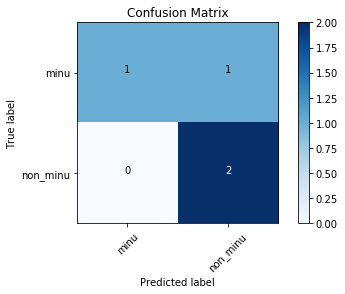

In [3]:
score = model.evaluate_generator(test_batches)
print ('Test accuracy:', score[1])

test_labels = test_batches.classes[test_batches.index_array]
# ============= Plot confusion matrix ==================

predictions = model.predict_generator(test_batches)

cm = confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_plot_labels = ['minu','non_minu']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Example predicting each patch
Note: FineNet works correctly with 'nearest' setting in resize function

In [4]:
# # Can use this
# from keras.preprocessing.image import load_img
# image = load_img('../Dataset/samples/m2.jpg',target_size=(224,224))

# or this
import cv2

image = cv2.imread('../Dataset/samples/patch.jpg')
image = cv2.resize(image, dsize=(224, 224),interpolation=cv2.INTER_NEAREST)
image = np.expand_dims(image, axis=0)

[class_idx] = np.argmax(model.predict(image),axis=1)
print (class_idx)
print (test_batches.class_indices)

0
{'minu': 0, 'non_minu': 1}
